<ipython-input-41-0b3dbf989cab>:26: RuntimeWarning: divide by zero encountered in true_divide
  y = (z_p - z_c)/z  # The y coordinate of this point in camera screen
<ipython-input-41-0b3dbf989cab>:27: RuntimeWarning: invalid value encountered in double_scalars
  x = x_dis/z         # the x coordinate of this point in camera screen


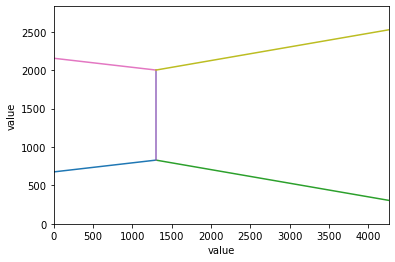

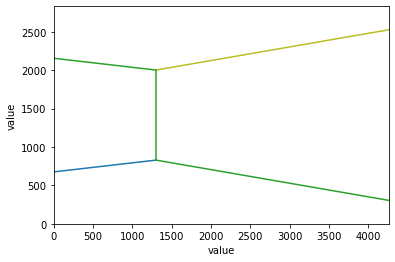

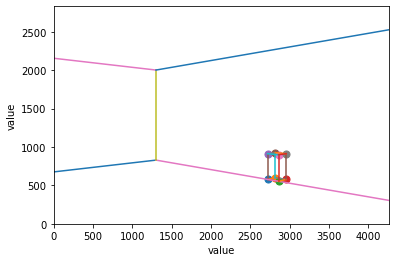

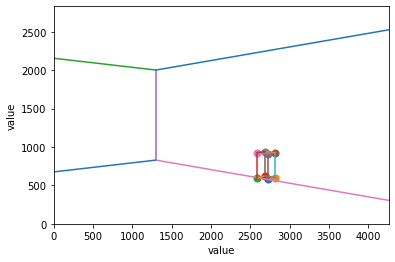

In [41]:
import numpy as np
import matplotlib.pyplot as plt


length = 20 #define the general location of the room.
width = 30
height = 10
h = 5   #define the height of the camera of variable h.

def World_Position_To_Camera_Position(position_of_one_person, camera):
    angle = np.pi / 4
    allpoints_in_camerascreen = np.zeros((32,3))
    for i in range(4):
        x_c = camera[i][0]  # The camera position (x_c, y_c, z_c) in the world
        y_c = camera[i][1]
        z_c = camera[i][2]
        
        current_point  = np.zeros((1,3))
    
        for j in range(8):
            x_p = position_of_one_person[j,0]  # One of eight points of the person's position in the world
            y_p = position_of_one_person[j,1]
            z_p = position_of_one_person[j,2]
            z = np.abs(x_p - x_c) * np.cos(angle) + np.abs(y_p - y_c) * np.sin(angle)       #   The distance in xy-plant of the person to the camera
            x_dis = np.abs(x_p - x_c) * np.sin(angle) - np.abs(y_p - y_c) * np.cos(angle)   #   The world distance of the person in x-orientation of the camera-axis
            y = (z_p - z_c)/z  # The y coordinate of this point in camera screen
            x = x_dis/z         # the x coordinate of this point in camera screen
            current_point[0,0] = x
            current_point[0,1] = y
            current_point[0,2] = 1
            allpoints_in_camerascreen[8*i + j] = current_point

    return allpoints_in_camerascreen

#define the internal parameter f, Distinguishability, Sensor_size, reference to NiKon D700
f =  35*10**(-3)                            
Distinguishability = [4256,2832]
Sensor_size = [36.0*10**(-3),23.9*10**(-3)]
camera_data = [f, Distinguishability, Sensor_size]
#to calculate the internal parameter matrix, which can transform the position in camera   

dx = Sensor_size[0] / Distinguishability[0]
dy = Sensor_size[1] / Distinguishability[1]
fx = f / dx
fy = f / dy
u0 = Distinguishability[0] / 2
v0 = Distinguishability[1] / 2

internal_parameter_matrix = np.zeros((3,3))
internal_parameter_matrix[0,0] = fx
internal_parameter_matrix[1,1] = fy
internal_parameter_matrix[2,2] = 1
internal_parameter_matrix[0,2] = u0
internal_parameter_matrix[1,2] = v0
internal_parameter_matrix = np.mat(internal_parameter_matrix)

camera1 = [length/2, width/2, h]
camera2 = [length/2, -width/2, h]
camera3 = [-length/2, width/2, h]
camera4 = [-length/2, -width/2, h]
camera = [camera1, camera2, camera3, camera4, camera_data]

def Active_Tracker_Camera(position_of_one_person):    #input a 8*3 matrix as the 8 position of a person.
    position_in_camera = np.zeros((32,3))
    position_in_pixel = np.zeros((32,3))
    result = np.zeros((32,3))
    
    position_in_camera = position_in_camera + World_Position_To_Camera_Position(position_of_one_person, camera)

    #transform the camera position to the pixel position by /dx and /dy, and add u0, v0 to change the origin to the left_up point
    #all of above can complete by *internal_parameter_matrix

    a = np.zeros((1,3))

    for i in range (32):
        a = np.transpose(position_in_camera[i])
        a = np.mat(a)
        a = a.T
        position_in_pixel = np.dot(internal_parameter_matrix,a)
        position_in_pixel = np.transpose(position_in_pixel)
        result[i] = position_in_pixel

    return result


##draw the edges of the walls
wall = np.matrix('-10,-15,0;10,-15,0;-10,15,0;10,15,0;-10,-15,10;10,-15,10;-10,15,10;10,15,10')
wall_in_camera = np.zeros((32,3))
wall_in_camera = Active_Tracker_Camera(wall)

position_of_one_person = np.matrix('10,0,0;11,0,0;10,1,0;11,1,0;10,0,2;11,0,2;10,1,2;11,1,2')      ##when initializing the positions of the object
result = Active_Tracker_Camera(position_of_one_person)                                             ##please refer to the grey code for index for following code
x_axis = []
y_axis = []

for i in range(4):
    for j in range(8):
        x = int(result[j + 8*i][0])
        y = int(result[j + 8*i][1])
        plt.scatter(x,y,50)
    for m in range(8):
       for n in range(m,8):
            if ((m==0) and (n==1)) or ((m==0) and (n==2)) or ((m==0) and (n==4)) or ((m==1) and (n==3)) or ((m==1) and (n==5)) or ((m==2) and (n==3)) or ((m==2) and (n==6)) or ((m==3) and (n==7)) or ((m==4) and (n==5)) or((m==4) and (n==6)) or ((m==5) and (n==7)) or ((m==6) and (n==7)):
                plt.plot([wall_in_camera[m + 8*i][0],wall_in_camera[n + 8*i][0]],[wall_in_camera[m + 8*i][1],wall_in_camera[n + 8*i][1]])
                plt.plot([result[m + 8*i][0],result[n + 8*i][0]],[result[m + 8*i][1],result[n + 8*i][1]])
    plt.xlabel("value",fontsize = 10)
    plt.ylabel("value",fontsize = 10)
    plt.xlim(0,4256)
    plt.ylim(0,2832)
    plt.show()




4
